# Đồ án cuối kì
Thông tin nhóm:
1. Lê Hồng Huy - 18120182
2. Nguyễn Thị Minh Vượng - 18120265
<br/><br/>

Github làm việc [tại đây](https://github.com/MinhVuong2000/P4DS-FinalProject)

---

## Môi trường code

In [1]:
import sys
sys.executable

'/Users/vuongnguyenthiminh/opt/anaconda3/envs/min_ds-env/bin/python'

---

## Import các thư viện cần thiết

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

---

## Thu thập dữ liệu

- **Dữ liệu**: https://www.kaggle.com/fedesoriano/heart-failure-prediction
- **Nguồn**: Bộ dữ liệu này được tạo ra bằng cách kết hợp các bộ dữ liệu khác nhau đã có sẵn độc lập nhưng không được kết hợp trước đó. Trong bộ dữ liệu này, 5 bộ dữ liệu tim được kết hợp trên 11 tính năng phổ biến làm cho nó trở thành bộ dữ liệu bệnh tim lớn nhất có sẵn cho đến nay cho mục đích nghiên cứu:
    - Cleveland: 303 quan sát
    - Hungarian: 294 quan sát
    - Switzerland: 123 quan sát
    - Long Beach VA: 200 quan sát
    - Stalog (Heart) Data Set: 270 quan sát
- **Giấy phép**: Open Data Commons Open Database License (ODbL) v1.0

### Tải dữ liệu 

In [5]:
!wget -O data.csv https://gist.githubusercontent.com/MinhVuong2000/8286380838ef575032894dceab5072ed/raw/cc96ec954cc1d94c0548a32f64ff29ba3f8390bf/heart.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


### Đọc dữ liệu

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Khám phá dữ liệu
Dữ liệu có bao nhiêu dòng và bao nhiêu cột?
• Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa
khác nhau không?
• Dữ liệu có các dòng bị lặp không?
• Mỗi cột có ý nghĩa gì?
• Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu
dữ liệu chưa phù hợp để có thể xử lý tiếp không?
• Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá
trị được phân bố như thế nào?
• Số-lượng/tỉ-lệ các giá trị thiếu?
• Min? max? → Có gì bất thường không?
• Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical),
các giá trị được phân bố như thế nào?
• Số-lượng/tỉ-lệ các giá trị thiếu?
• Số lượng các giá trị khác nhau? Show một vài giá trị
→ Có gì bất thường không?

### Dữ liệu gồm bao nhiêu dòng và bao nhiêu cột ?

In [5]:
num_rows, num_cols = df.shape
print(f"Số dòng là: {num_rows}, số cột là: {num_cols}")

Số dòng là: 918, số cột là: 12


### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không ?

Theo mô tả của dữ liệu thì mỗi dòng sẽ chứa 11 đặc điểm lâm sàng để dự đoán sự kiện bị bệnh tim ở 1 người và theo dữ liệu thì không có dòng nào "lạc loài"

### Dữ liệu các dòng có bị lặp không ?

In [6]:
if len(df.duplicated().unique())==1:
    print("Dữ liệu không có dòng trùng lặp")
else:
    print("Dữ liệu có dòng bị trùng lặp")

Dữ liệu không có dòng trùng lặp


### Mỗi cột có ý nghĩa gì ?

Dưới đây là phần mô tả của dữ liệu về các cột trong file "heart.csv":
- **Age**: Tuổi của bệnh nhân
- **Sex**: Giới tính của bệnh nhân [M: Nam, F: Nữ]
- **ChestPainType**: Loại đau ngực [TA: Đau thắt ngực điển hình, ATA: Đau thắt ngực không điển hình, NAP: Đau không âm đạo, ASY: Không có triệu chứng]
- **RestBP**: Huyết áp khi nghỉ ngơi [mm/Hg]
- **Cholesterol**: Cholesterol huyết thanh [mm/dl]
- **Nhịn ăn**: Lượng đường trong máu lúc đói [1: nếu FastingBS > 120 mg/dl, 0: nếu không]
- **RestECG**: Kết quả điện tâm đồ lúc nghỉ ngơi [Normal: Bình thường, ST: có bất thường sóng ST-T (đảo ngược sóng T và / hoặc độ cao ST hoặc trầm cảm > 0,05 mV), LVH: cho thấy phì đại thất trái có thể xảy ra hoặc xác định theo tiêu chí của Estes]
- **MaxHR**: Nhịp tim tối đa đạt được [Giá trị số từ 60 đến 202]
- **ExerciseAngina**: Đau thắt ngực do tập thể dục [Y: Có, N: Không]
- **Oldpeak**: oldpeak = ST [Giá trị số đo được trong trầm cảm]
- **ST_Slope**: độ dốc của đoạn ST tập thể dục đỉnh cao [Up: lên, Flat: phẳng, Down: xuống dốc]
- **HeartDisease**: lớp đầu ra [1: Bệnh tim, 0: Bình thường]

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [8]:
col_types = df.dtypes
print("Kiểu dữ liệu của các cột là: ")
print(col_types)

Kiểu dữ liệu của các cột là: 
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


### Nhìn tổng quan dữ liệu của chúng ta

In [ ]:
df.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


### Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?

In [10]:
def missing_ratio(s):
    return s.isna().mean() * 100
nume_col_profiles_df=df[['Age','RestingBP', 'Cholesterol','MaxHR','Oldpeak']]
nume_col_profiles_df=nume_col_profiles_df.agg([missing_ratio, pd.Series.min, pd.Series.max])
nume_col_profiles_df

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
missing_ratio,0.0,0.0,0.0,0.0,0.0
min,28.0,0.0,0.0,60.0,-2.6
max,77.0,200.0,603.0,202.0,6.2


### Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào? 

In [11]:
def num_diff_vals(s):
    return s.nunique()
def diff_vals(s):
    return s.dropna().unique()
cate_col_profiles_df=df[["Sex", "ChestPainType",
                             "RestingECG", "ExerciseAngina", "ST_Slope","FastingBS"]]
cate_col_profiles_df=cate_col_profiles_df.agg([missing_ratio, num_diff_vals, diff_vals])
cate_col_profiles_df

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,FastingBS
missing_ratio,0,0,0,0,0,0
num_diff_vals,2,4,3,2,3,2
diff_vals,"[M, F]","[ATA, NAP, ASY, TA]","[Normal, ST, LVH]","[N, Y]","[Up, Flat, Down]","[0, 1]"


## Tiền xử lý

## Đặt câu hỏi
Nhóm bạn nên tập trung vào chất lượng câu hỏi hơn là số lượng câu hỏi
Trong file notebook, với mỗi câu hỏi, nhóm bạn cần trình bày:
• Câu hỏi là gì?
• Nếu trả lời được câu hỏi thì sẽ có lợi ích gì? (câu hỏi không quá dễ để trả lời - 1 dòng code)

### Câu hỏi 1: Tỉ lệ giới tính ảnh hưởng như thế nào đối với kết quả bị bệnh tim hay không bị bệnh tim ?

#### Nếu giải quyết câu hỏi sẽ: 
- Biết được tỉ lệ giới tính nào sẽ có nguy cơ cao hơn trong việc mắc các bệnh về tim mạch
- Đưa ra các phương án phòng ngừa, tầm soát phù hợp cũng như có kế hoạch dự đoán thích hợp đối với các đối tượng nguy cơ dựa trên giới tính

Cách bước tiến hành:
- **Bước 1**: Tính tỉ lệ mắc bệnh tim giữa các giới tính dựa trên dữ liệu, kết quả được lưu vào dataframe sex_ratio
- **Bước 2**: Vẽ biểu đồ cột thể hiện tỉ lệ mắc bệnh tim giữa các giới tính

Code bước 1.

In [14]:
sex_ratio = df.groupby(['Sex','HeartDisease']).size().unstack()/df.shape[0]

Code bước 2.

(array([0, 1]), [Text(0, 0, 'F'), Text(1, 0, 'M')])

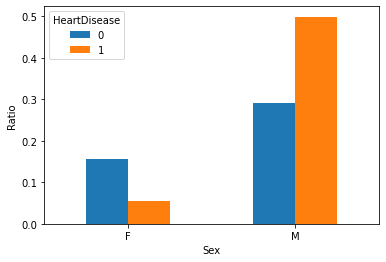

In [19]:
sex_ratio.plot.bar(ylabel='Ratio')
plt.xticks(rotation=0)

### Câu hỏi 2: Các nhóm tuổi ảnh hưởng như thế nào đến kết quả bị bệnh tim hay không ?

#### Nếu giải quyết câu hỏi sẽ: 
- Biết được nhóm tuổi nào sẽ có nguy cơ cao hơn trong việc mắc các bệnh về tim mạch
- Đưa ra các phương án phòng ngừa, tầm soát phù hợp cũng như có kế hoạch dự đoán thích hợp đối với các đối tượng nguy cơ dựa trên nhóm tuổi

#### Tiền xử lý & Phân tích để trả lời câu hỏi
- Để tiện cho việc xử lý dữ liệu, tiến hành thêm 1 cột trong dataframe ban đầu là chia cột tuổi thành 3 nhóm `young`, `middle_aged` và `old`

In [36]:
df["Age_group"] = pd.cut(x=df["Age"], bins=[0,30,60,100], labels=["young","middle_aged","old"])

middle_aged    692
old            221
young            5
Name: Age_group, dtype: int64

Tiến hành vẽ dữ liệu theo như câu 1 để xem có gì hay không nhé :)

<AxesSubplot:xlabel='Age_group', ylabel='Ratio'>

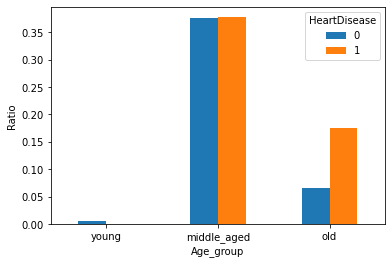

In [76]:
temp = df.groupby(['Age_group','HeartDisease']).size().unstack()/df.shape[0]
temp.plot.bar(ylabel="Ratio", rot=0)

Oh Wao, ta nhận thấy có vẻ ở nhóm tuổi `middle_aged` thì tỉ lệ bệnh tim và không bệnh tim gần như là bằng nhau vậy thì ở độ tuổi này sẽ có các yếu tố nguy cơ khác ảnh hưởng, vậy làm sao tìm ra đây ? Liệu nếu việc chia tỉ lệ độ tuổi khác nhau có ảnh hưởng hay không ? Cùng thử xem

<AxesSubplot:xlabel='Age_group_2'>

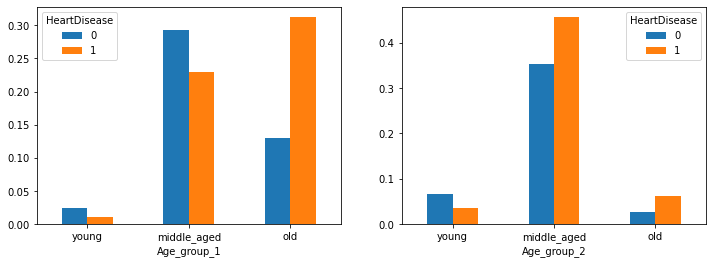

In [75]:
df["Age_group_1"] = pd.cut(x=df["Age"], bins=[0,35,55,100], labels=["young","middle_aged","old"])
temp1 = df.groupby(['Age_group_1','HeartDisease']).size().unstack()/df.shape[0]

df["Age_group_2"] = pd.cut(x=df["Age"], bins=[0,40,65,100], labels=["young","middle_aged","old"])
temp2 = df.groupby(['Age_group_2','HeartDisease']).size().unstack()/df.shape[0]

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(4)
fig.set_figwidth(12)
temp1.plot.bar(ax=axes[0], rot=0)
temp2.plot.bar(ax=axes[1], rot=0)


Từ dữ liệu quan sát, ta nhận thấy ở lứa tuổi `middle_aged` ở cả 3 cách chia độ tuổi đều không thể xác định được tỉ lệ bệnh tim ở các độ tuổi này, nhưng riêng với độ tuổi `old` và  `young` ta đều thấy tỉ lệ mắc bệnh tim ở độ tuổi `young ` luôn thấp hơn và `old` luôn cao hơn

## Nhìn lại quá trình làm đồ án
Sau bao ngày vất vả làm đồ án thì bây giờ đã kết thúc. Bây
giờ là lúc để ngồi uống coffee và tĩnh tâm nhìn lại quãng
đường vừa qua
• Mỗi thành viên: Đã gặp những khó khăn gì? (Hay mọi
chuyện đều thuận lợi)
• Mỗi thành viên: Có học được gì hữu ích? (Hay không
học được gì)
• Nhóm: Nếu có thêm thời gian thì sẽ làm gì?
Phần này có sao thì bạn nói vậy thôi, chứ không phải là viết
cho có, hoặc tự chế ra để nghe cho hay
• Chart: phát hiện insight từ chart

- **Những khó khăn**: Khó khăn đầu tiên là việc lựa chọn data để tiến hành làm đồ án, giữa rất nhiều data được chia sẻ trên mạng, cần tìm ra data phù hợp để tiến hành phân tích và trả lời câu hỏi cũng là khó khăn đầu tiên. Tiếp theo là việc review lại các kiến thức đã được học, các kiến thức được học chủ yếu là nhớ các công việc mà các công cụ có thể làm, việc nhớ cú pháp khá khó khăn.
- **Những điều học được**: Học được cách tự giải quyết vấn đề, đồ án tuy làm chung nhóm nhưng vẫn phải chia các branch khác nhau để làm nên vẫn đề cao khả năng làm việc độc lập. Hiểu được thêm về đồng đội trong đồ án, cũng là đồng đội trong luận văn, hiểu nhau nhiều hơn để có thể làm việc cùng nhau tốt hơn.
- **Nếu có thêm thời gian**: Áp dụng các thuật toán học máy để phân tích mức độ ảnh hưởng cũng như dự đoán được bệnh tim dựa trên các feature đã có.

## Tài liệu tham khảo
Để hoàn thành đồ án thì nhóm bạn đã tham khảo những tài liệu nào?

- https://opendatacommons.org/licenses/odbl/1-0/
- https://www.kaggle.com/fedesoriano/heart-failure-prediction